# AML Practical 3.1

<b>Name:</b> Patel Jaynil Sunilkumar<br>
<b>Roll No:</b> 20MCED08<br>
<b>Course Name:</b> 3CS1111 Applied Machine Learning




## 1) Regularisation for GD 

In [3]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X, y = datasets.load_boston(return_X_y=True)
X_train_temp1=X[0:400,:]
X_train=np.zeros((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))
X_train[:,0]=np.ones((X_train_temp1.shape[0]))
X_train[:,1:]=X_train_temp1
print("Type of X_train:", type(X_train), "Shape of X_train:", X_train.shape)
y_train=y[0:400]
X_test_temp1=X[400:506,:]
X_test=np.zeros((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))
X_test[:,0]=np.ones((X_test_temp1.shape[0]))
X_test[:,1:]=X_test_temp1
print("Type of X_test:", type(X_test), "Shape of X_test:", X_test.shape)
y_test=y[400:506]
scaler=StandardScaler()
scaler.fit(X_train[:,1:])
X_train[:,1:]=scaler.transform(X_train[:,1:])
X_test[:,1:]=scaler.transform(X_test[:,1:])
#In this cell, we implement the algorithm
theta=np.random.uniform(0,1,size=(X_train.shape[1]))
print("Type of theta:", type(theta), "Shape of Theta:", theta.shape)
niterations=100
alpha=0.01
m=X_train.shape[0]
n=X_train.shape[1] 
lam_values = []
    
error_train=[]
error_test = []   
lam_values=[l for l in range(10,1000,50)]


def re_error(niterations, alpha, X_train, y_train, X_test, y_test, theta):
                    
                    for l in lam_values:
                                for i in range(niterations):
                                        update=np.zeros(X_train.shape[1]) #update is an arrayof size 14
                                        ypred=np.dot(X_train,theta) #y = theta_T.X
                                        error=ypred - y_train #find error
                                        for j in range(n): 
                                                        update[j]=np.sum(error*(X_train.T)[j]) 

                                                     #updated values of theta
                                                        theta[0] = theta[0] - (1/m)*(alpha)*update[0]
                                                        theta[1:] = theta[1:]*(1-(alpha*(l/m))) - ((1/m)*(alpha)*update[1:])

                                error_train.append(metrics.mean_squared_error(y_train,ypred))
                                #print("train: {0}".format(metrics.mean_squared_error(y_train,ypred)))
                                #test error
                                predictions=np.dot(X_test, theta)
                                #error_mse
                                error_test.append(metrics.mean_squared_error(y_test,predictions))
                                #print("Test: {0}".format(metrics.mean_squared_error(y_test,predictions)))

                    return error_train, error_test

train, test =re_error(100, alpha, X_train, y_train,X_test, y_test, theta)


Type of X_train: <class 'numpy.ndarray'> Shape of X_train: (400, 14)
Type of X_test: <class 'numpy.ndarray'> Shape of X_test: (106, 14)
Type of theta: <class 'numpy.ndarray'> Shape of Theta: (14,)


# Graph 

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


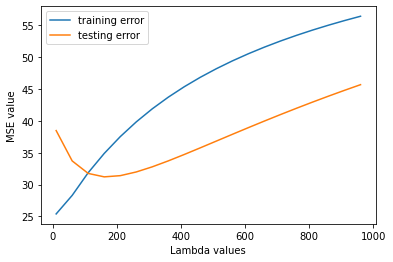

In [6]:
plt.plot(lam_values, train, label="training error")
plt.plot(lam_values, test, label="testing error")
plt.xlabel('Lambda values')
plt.ylabel('MSE value')

plt.legend()
plt.show()


# Observation

<p>As we can observe from the graph first training error is low compared to the testing error and with increasing the lambda value the training error also starts increasing and the testing error starts decreases.
</p>

## 2) Regularisation for NE

In [17]:
import numpy as np
from sklearn import datasets, metrics
from numpy.linalg import inv, pinv, LinAlgError

X, y = datasets.load_boston(return_X_y=True)

In [18]:
X_train_temp1=X[0:400,:]
X_train=np.zeros((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))
X_train[:,0]=np.ones((X_train_temp1.shape[0]))
X_train[:,1:]=X_train_temp1
print("Type of X_train:", type(X_train), "Shape of X_train:", X_train.shape)
y_train=y[0:400]


Type of X_train: <class 'numpy.ndarray'> Shape of X_train: (400, 14)


In [19]:
X_test_temp1=X[400:506,:]
X_test=np.zeros((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))
X_test[:,0]=np.ones((X_test_temp1.shape[0]))
X_test[:,1:]=X_test_temp1
print("Type of X_test:", type(X_test), "Shape of X_test:", X_test.shape)
y_test=y[400:506]


Type of X_test: <class 'numpy.ndarray'> Shape of X_test: (106, 14)


In [20]:
lam_values1=[l for l in range(10,1000,50)]
error_train=[]
error_test = []

In [21]:
side_matrix = np.zeros((X_train.shape[1],X_train.shape[1]))
for i in range(1, X_train.shape[1]):
     side_matrix[i,i]=1

In [22]:
def re_error1(theta=np.zeros(X_train.shape[1])):  
    for l in lam_values1:
        mat = l*side_matrix
        try:
            XTXi=inv(np.dot(X_train.T,X_train)+mat)
            #print(mat)
        except LinAlgError:
            XTXi=pinv(np.dot(X_train.T,X_train)+mat)
        XTy=np.dot(X_train.T,y_train)
        theta=np.dot(XTXi,XTy)
        ypred = np.dot(theta,X_train.T)
        #print("train: {0}".format(metrics.mean_squared_error(y_train,ypred)))
        predictions=np.dot(theta,X_test.T)
        #print("Test: {0}".format(metrics.mean_squared_error(y_test,predictions)))
        error_train.append(metrics.mean_squared_error(y_train,ypred))
        error_test.append(metrics.mean_squared_error(y_test,predictions))
    return  error_train, error_test, theta

train1, test1, theta =re_error1()

# Graph

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

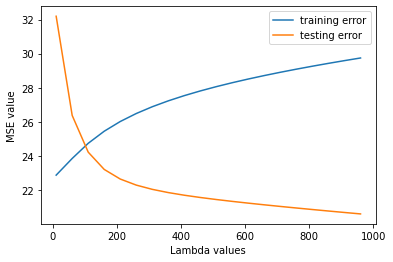

In [24]:
plt.plot(lam_values1, train1, label="training error")
plt.plot(lam_values1, test1, label="testing error")
plt.xlabel('Lambda values')
plt.ylabel('MSE value')

plt.legend()
plt.show()


# Observation

<p>As we can see in above graph we took lambda values in range 10,1000 with interval of 50.

Again like the gradient decent here also initially the training error is low when the lambda value is low and with increasing in lambda value it's also cause the increase in the training error(MSE) and for testing error it is decreasing with the increased lambda value.</p>